In [1]:
print('hello, World!')

hello, World!


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('../data files/Monthly_COVID-19_Death.csv')
df4 = pd.read_csv('../data files/Provisional_COVID-19_death_counts.csv')

# Data Cleaning

Starting with Dataset 1

In [4]:
df1_cleaned = df1.drop_duplicates().dropna()

In [5]:
print(df1_cleaned['subgroup1'].unique())

['Hispanic' 'Non-Hispanic Asian' 'Non-Hispanic Black' 'Non-Hispanic White'
 'Non-Hispanic American Indian or Alaska Native'
 'Non-Hispanic Native Hawaiian or Other Pacific Islander' '30-39 years'
 '40-49 years' '50-64 years' '65-74 years' '75+ years' '18-29 years'
 '12-17 years' '0-4 years' '5-11 years']


In [6]:
print(df1_cleaned['subgroup2'].unique())

['30-39 years' '40-49 years' '50-64 years' '65-74 years' '75+ years'
 '18-29 years' '12-17 years' '0-4 years' '5-11 years' 'Hispanic'
 'Non-Hispanic Asian' 'Non-Hispanic Black' 'Non-Hispanic White'
 'Non-Hispanic American Indian or Alaska Native'
 'Non-Hispanic Native Hawaiian or Other Pacific Islander']


In [7]:
ages = []
ethnicities = []



for i, row in df1_cleaned.iterrows():
    if 'years' in row['subgroup1']:
        ages.append(row.subgroup1)
        ethnicities.append(row.subgroup2)
    else:
        ethnicities.append(row.subgroup1)
        ages.append(row.subgroup2)

set(ages)
set(ethnicities)

df1_cleaned['Ages'] = ages
df1_cleaned['Races'] = ethnicities

In [8]:
df1_cleaned = df1_cleaned.drop(columns = ['subgroup1', 'subgroup2'])

In [9]:
df1_cleaned.sample(10)

,data_as_of,jurisdiction_residence,data_period_start,data_period_end,group,covid_deaths,crude_rate,conf_int_95pct_lower_crude,conf_int_95pct_upper_crude,note,Ages,Races
30224,06/13/2024,Region 6,03/01/2021,03/31/2021,Race and Age,18.0,0.67,0.36,0.99,Rates for death counts <20 should be interpret...,30-39 years,Non-Hispanic White
71471,06/13/2024,United States,04/01/2022,04/30/2022,Age and Race,10.0,4.75,1.80,7.69,Rates for death counts <20 should be interpret...,65-74 years,Non-Hispanic American Indian or Alaska Native
60438,06/13/2024,Region 6,07/01/2021,07/31/2021,Age and Race,10.0,3.31,1.26,5.36,Rates for death counts <20 should be interpret...,50-64 years,Non-Hispanic Asian
28026,06/13/2024,Region 6,07/01/2023,07/31/2023,Race and Age,11.0,0.56,0.23,0.89,Rates for death counts <20 should be interpret...,50-64 years,Hispanic
22741,06/13/2024,Region 4,05/01/2020,05/31/2020,Race and Age,10.0,16.34,6.21,26.47,Rates for death counts <20 should be interpret...,50-64 years,Non-Hispanic American Indian or Alaska Native
71678,06/13/2024,United States,11/01/2021,11/30/2021,Age and Race,15.0,0.48,0.24,0.72,Rates for death counts <20 should be interpret...,18-29 years,Non-Hispanic Asian
61903,06/13/2024,Region 6,05/01/2024,05/31/2024,Age and Race,10.0,0.24,0.09,0.39,Rates for death counts <20 should be interpret...,50-64 years,Non-Hispanic White
15923,06/13/2024,Region 10,12/01/2021,12/31/2021,Race and Age,15.0,1.04,0.51,1.57,Rates for death counts <20 should be interpret...,30-39 years,Non-Hispanic White
26655,06/13/2024,Region 5,02/01/2024,02/29/2024,Race and Age,17.0,3.53,1.85,5.21,Rates for death counts <20 should be interpret...,65-74 years,Non-Hispanic Black
31864,06/13/2024,Region 7,12/01/2020,12/31/2020,Race and Age,14.0,70.69,33.66,107.71,Rates for death counts <20 should be interpret...,65-74 years,Non-Hispanic Asian


In [10]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3278 entries, 10656 to 73270
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   data_as_of                  3278 non-null   object 
 1   jurisdiction_residence      3278 non-null   object 
 2   data_period_start           3278 non-null   object 
 3   data_period_end             3278 non-null   object 
 4   group                       3278 non-null   object 
 5   covid_deaths                3278 non-null   float64
 6   crude_rate                  3278 non-null   float64
 7   conf_int_95pct_lower_crude  3278 non-null   float64
 8   conf_int_95pct_upper_crude  3278 non-null   float64
 9   note                        3278 non-null   object 
 10  Ages                        3278 non-null   object 
 11  Races                       3278 non-null   object 
dtypes: float64(4), object(8)
memory usage: 332.9+ KB


# Graphing

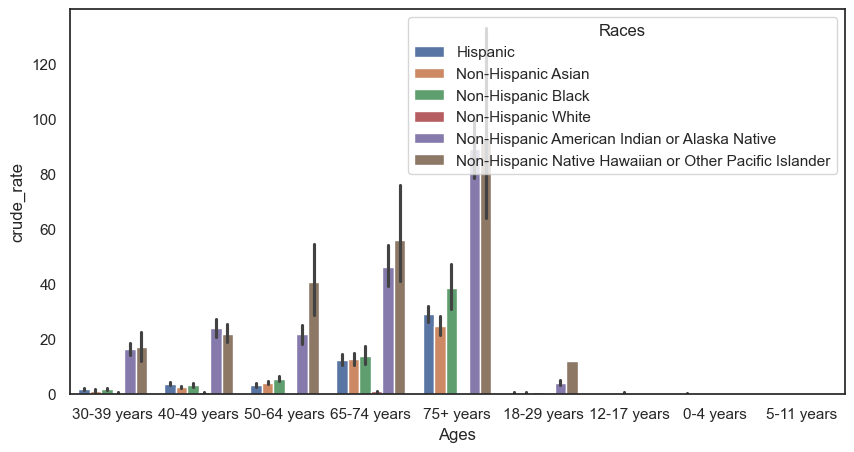

In [11]:
sns.set_theme(style='white', rc={'figure.figsize':(10,5)})
graph = sns.barplot(data=df1_cleaned, x='Ages', y='crude_rate', hue='Races')

The above graph is from dataset 1: here we are graphing age ranges against the crude rate of COVID deaths. The different bars correspond to different ethnicity/race profiles